In [ ]:
!pip install --upgrade pip
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 1.8/1.8 MB 20.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.3.1
    Uninstalling pip-24.3.1:
      Successfully uninstalled pip-24.3.1
Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ----------------------- ---------------- 6.3/10.7 MB 32.2 MB/s eta 0:00:01
   ---------------------------------------- 10.7/10.7 MB 30.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.4 MB ? eta -:--:--
   ------------- -------------------------- 13.4/38.4 MB 70.1 MB/s eta 0:00:01
   --------------------------- ------------ 26.0/38.4 MB 65.9 MB/s eta 0:00:01
   ------------------------------------- -- 36.4/38.4 MB 59.4 MB/s eta 0:00:01
   ------------------

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pickle
import plotly.express as px
import streamlit as st


In [14]:
# loading excel
player_raw = pd.read_csv("Player_Stats.csv", encoding="latin1")

pd.set_option('display.max_rows', None) # display all rows
pd.set_option('display.max_columns', None) # display all columns


player_raw.head()


,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasAtt,PasLive,PasDead,PasFK,TB,Sw,PasCrs,TI,CK,CkIn,CkOut,CkStr,PasCmp,PasOff,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDri%,TklDriPast,Blocks,BlkSh,BlkPass,Int,Tkl+Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,ToAtt,ToSuc,ToSuc%,ToTkl,ToTkl%,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,Rec,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,1596,17.7,1,1.53,0.28,18.5,0.04,0.20,19.0,0.11,0.0,0.0,23.2,31.0,74.9,293.0,85.7,13.3,16.2,81.9,5.93,7.74,76.6,0.90,2.37,38.1,0.11,1.75,1.75,0.45,0.11,3.22,31.0,28.1,2.88,0.96,0.17,0.00,2.54,0.23,1.47,0.68,0.62,0.06,23.2,0.00,0.85,3.62,2.37,0.56,0.23,0.11,0.28,0.06,0.28,0.17,0.0,0.0,0.06,0.0,0.06,1.64,0.51,0.45,0.90,0.28,0.51,1.47,34.6,0.96,1.69,0.11,1.58,0.06,1.69,0.28,0.06,44.0,0.40,4.35,19.0,21.50,2.49,44.0,3.73,1.19,31.8,1.75,47.0,26.7,136.1,56.6,1.53,1.07,0.40,2.60,3.11,30.2,5.65,0.11,0.0,0.0,0.62,2.26,0.17,2.54,0.51,0.0,0.0,0.00,4.86,0.34,1.19,22.2
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,1980,22.0,0,0.86,0.05,5.3,0.00,0.00,13.5,0.00,0.0,0.0,38.5,47.2,81.5,751.5,318.5,10.9,12.9,84.5,23.20,25.70,90.1,3.77,7.00,53.9,0.05,0.27,2.91,0.09,0.00,4.50,47.2,43.3,3.73,3.32,0.00,0.55,0.18,0.09,0.00,0.00,0.00,0.00,38.5,0.23,0.59,1.14,0.86,0.00,0.00,0.18,0.00,0.09,0.18,0.14,0.0,0.0,0.05,0.0,0.00,2.50,1.59,1.45,1.00,0.05,1.32,1.68,78.4,0.36,2.23,0.77,1.45,2.00,4.50,2.91,0.05,59.2,6.23,27.50,29.5,2.73,1.09,59.2,0.68,0.32,46.7,0.36,53.3,40.0,234.2,125.0,0.55,0.23,0.09,0.73,0.68,34.5,0.23,0.09,0.0,0.0,1.32,0.50,0.05,0.18,1.59,0.0,0.0,0.00,6.64,2.18,1.23,64.0
2,3,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,770,8.6,0,1.05,0.35,33.3,0.00,0.00,19.2,0.00,0.0,0.0,40.0,49.5,80.8,676.0,188.1,18.5,22.0,84.1,15.50,18.70,82.6,4.42,5.93,74.5,0.00,1.51,3.95,1.74,0.35,6.40,49.5,48.1,1.16,0.35,0.12,0.23,1.05,0.81,0.00,0.00,0.00,0.00,40.0,0.23,1.16,2.67,2.44,0.00,0.00,0.12,0.00,0.12,0.00,0.00,0.0,0.0,0.00,0.0,0.00,2.91,1.40,1.28,1.40,0.23,1.63,2.67,60.9,1.05,1.51,0.12,1.40,0.93,3.84,0.93,0.00,62.6,0.93,11.40,36.0,17.40,1.16,62.6,3.84,2.09,54.5,1.51,39.4,48.5,298.5,151.0,2.56,2.56,0.47,2.09,1.05,43.4,5.93,0.12,0.0,0.0,1.74,1.28,0.00,1.05,1.40,0.0,0.0,0.00,8.14,0.93,1.05,47.1
3,4,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,20,20,1799,20.0,1,0.60,0.15,25.0,0.08,0.33,20.3,0.00,0.0,0.0,59.5,64.9,91.6,946.3,226.9,29.6,31.8,93.2,24.70,26.20,94.3,3.35,4.30,77.9,0.00,0.50,6.00,0.55,0.10,5.60,64.9,63.1,1.40,1.30,0.05,0.20,0.35,0.10,0.00,0.00,0.00,0.00,59.5,0.35,0.40,1.60,1.35,0.00,0.10,0.10,0.00,0.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,1.50,0.80,0.55,0.85,0.10,0.85,1.30,65.4,0.45,1.30,0.35,0.95,1.10,2.60,0.80,0.00,73.3,2.10,12.00,49.6,12.20,0.70,73.3,1.25,0.70,56.0,0.40,32.0,61.0,316.9,117.5,1.25,1.95,0.15,1.35,1.30,56.5,1.70,0.15,0.0,0.0,2.45,1.35,0.00,0.35,0.80,0.0,0.0,0.05,6.60,0.50,0.50,50.0
4,5,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,1993,15,15,1165,12.9,0,0.31,0.00,0.0,0.00,0.00,23.9,0.00,0.0,0.0,37.9,43.4,87.3,613.6,224.7,17.9,19.4,92.4,15.70,17.80,88.6,2.64,3.95,66.7,0.08,0.62,3.88,0.39,0.00,5.04,43.4,42.6,0.78,0.78,0.39,0.16,0.23,0.00,0.00,0.00,0.00,0.00,37.9,0.08,0.31,1.24,1.01,0.08,0.00,0.08,0.00,0.08,0.08,0.08,0.0,0.0,0.00,0.0,0.00,3.80,2.02,2.64,1.16,0.00,1.32,3.26,40.5,1.94,1.40,0.23,1.16,1.16,4.96,1.55,0.00,54.7,3.26,19.20,31.4,4.88,0.23,54.7,0.93,0.54,58.3,0.31,33.3,41.0,174.3,72.7,0.47,0.93,0.00,1.32,0.78,36.4,0.47,0.16,0.0,0.0,0.93,1.01,0.00,0.23,2.02,0.0,0.0,0.00,6.51,0.31,0.39,44.4


In [15]:
player_raw.shape

(2689, 124)

In [27]:
%pip install requests beautifulsoup4
from bs4 import BeautifulSoup


Defaulting to user installation because normal site-packages is not writeable

   ---------------------------------------- 0/2 [soupsieve]
   -------------------- ------------------- 1/2 [beautifulsoup4]
   -------------------- ------------------- 1/2 [beautifulsoup4]
   -------------------- ------------------- 1/2 [beautifulsoup4]
   -------------------- ------------------- 1/2 [beautifulsoup4]
   -------------------- ------------------- 1/2 [beautifulsoup4]
   -------------------- ------------------- 1/2 [beautifulsoup4]
   -------------------- ------------------- 1/2 [beautifulsoup4]
   -------------------- ------------------- 1/2 [beautifulsoup4]
   -------------------- ------------------- 1/2 [beautifulsoup4]
   -------------------- ------------------- 1/2 [beautifulsoup4]
   ---------------------------------------- 2/2 [beautifulsoup4]

Note: you may need to restart the kernel to use updated packages.


## Data Scraping of current player and market prices


In [28]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

# Your list of player names
# player_list = ["Brenden Aaronson", "Yunis Abdelhamid", "Himad Abdelli"]
player_list = player_raw['Player'].unique()
# player_list = ['Yunis Abdelhamid']

# Base URL for player search
base_url = "https://www.transfermarkt.com/schnellsuche/ergebnis/schnellsuche?query="
results = []

# Total number of players
total_players = len(player_list)

for i, player in enumerate(player_list, start=1):
    search_url = base_url + player.replace(" ", "+")
    print(f"Processing player {i}/{total_players}: {player}")

    try:
        response = requests.get(search_url, headers={"User-Agent": "Mozilla/5.0"})
        response.raise_for_status()
        soup = BeautifulSoup(response.text, "html.parser")

        market_value_tag = soup.find("td", class_="rechts hauptlink")
        if market_value_tag:
            market_value = market_value_tag.text.strip()
        else:
            market_value = "Not Found"

        results.append({"Player": player, "Market Value": market_value})
    except Exception as e:
        results.append({"Player": player, "Market Value": "Error: " + str(e)})

    time.sleep(2)

Processing player 1/2530: Brenden Aaronson
Processing player 2/2530: Yunis Abdelhamid
Processing player 3/2530: Himad Abdelli
Processing player 4/2530: Salis Abdul Samed
Processing player 5/2530: Laurent Abergel
Processing player 6/2530: Oliver Abildgaard
Processing player 7/2530: Matthis Abline
Processing player 8/2530: Abner
Processing player 9/2530: Zakaria Aboukhlal
Processing player 10/2530: Tammy Abraham
Processing player 11/2530: Francesco Acerbi
Processing player 12/2530: Mohamed Achi
Processing player 13/2530: Marcos Acuña
Processing player 14/2530: Che Adams
Processing player 15/2530: Tyler Adams
Processing player 16/2530: Sargis Adamyan
Processing player 17/2530: Tosin Adarabioyo
Processing player 18/2530: Martin Adeline
Processing player 19/2530: Karim Adeyemi
Processing player 20/2530: Amine Adli
Processing player 21/2530: Yacine Adli


KeyboardInterrupt: 

In [17]:
df_results = pd.DataFrame(results)

print(df_results)
df_results.to_csv("player_market_values.csv", index=False)

NameError: name 'results' is not defined

## Data Pre-processing (Updating currency & Dealing with missing values)

In [29]:
df2 = pd.read_csv("player_market_values.csv")

df2 = df2[df2['Market Value'] != 'Not Found']
df2 = df2[df2['Market Value'] != '-']


def clean_value(value):
    value = value.replace("€", "").replace(",", "").strip()
    if "m" in value:
        return float(value.replace("m", "")) * 1_000_000
    elif "k" in value:
        return float(value.replace("k", "")) * 1_000
    else:
        return float(value)

# Convert Market Value column to numeric values
df2["Market Value Euros"] = df2["Market Value"].apply(clean_value)

# Joining the Market Value to the Main DF
print(player_raw.shape)
player_raw = player_raw.merge(df2[["Player", "Market Value Euros"]], how='left', on='Player')
print(player_raw.shape)

player_raw = player_raw[~player_raw['Market Value Euros'].isna()]
print(player_raw.shape)
player_raw.head()

(2689, 124)
(2689, 125)
(2447, 125)


,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasAtt,PasLive,PasDead,PasFK,TB,Sw,PasCrs,TI,CK,CkIn,CkOut,CkStr,PasCmp,PasOff,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDri%,TklDriPast,Blocks,BlkSh,BlkPass,Int,Tkl+Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,ToAtt,ToSuc,ToSuc%,ToTkl,ToTkl%,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,Rec,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%,Market Value Euros
0,1,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,1596,17.7,1,1.53,0.28,18.5,0.04,0.20,19.0,0.11,0.0,0.0,23.2,31.0,74.9,293.0,85.7,13.3,16.2,81.9,5.93,7.74,76.6,0.90,2.37,38.1,0.11,1.75,1.75,0.45,0.11,3.22,31.0,28.1,2.88,0.96,0.17,0.00,2.54,0.23,1.47,0.68,0.62,0.06,23.2,0.00,0.85,3.62,2.37,0.56,0.23,0.11,0.28,0.06,0.28,0.17,0.0,0.0,0.06,0.0,0.06,1.64,0.51,0.45,0.90,0.28,0.51,1.47,34.6,0.96,1.69,0.11,1.58,0.06,1.69,0.28,0.06,44.0,0.40,4.35,19.0,21.50,2.49,44.0,3.73,1.19,31.8,1.75,47.0,26.7,136.1,56.6,1.53,1.07,0.40,2.60,3.11,30.2,5.65,0.11,0.0,0.0,0.62,2.26,0.17,2.54,0.51,0.0,0.0,0.00,4.86,0.34,1.19,22.2,15000000.0
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,1980,22.0,0,0.86,0.05,5.3,0.00,0.00,13.5,0.00,0.0,0.0,38.5,47.2,81.5,751.5,318.5,10.9,12.9,84.5,23.20,25.70,90.1,3.77,7.00,53.9,0.05,0.27,2.91,0.09,0.00,4.50,47.2,43.3,3.73,3.32,0.00,0.55,0.18,0.09,0.00,0.00,0.00,0.00,38.5,0.23,0.59,1.14,0.86,0.00,0.00,0.18,0.00,0.09,0.18,0.14,0.0,0.0,0.05,0.0,0.00,2.50,1.59,1.45,1.00,0.05,1.32,1.68,78.4,0.36,2.23,0.77,1.45,2.00,4.50,2.91,0.05,59.2,6.23,27.50,29.5,2.73,1.09,59.2,0.68,0.32,46.7,0.36,53.3,40.0,234.2,125.0,0.55,0.23,0.09,0.73,0.68,34.5,0.23,0.09,0.0,0.0,1.32,0.50,0.05,0.18,1.59,0.0,0.0,0.00,6.64,2.18,1.23,64.0,400000.0
2,3,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,770,8.6,0,1.05,0.35,33.3,0.00,0.00,19.2,0.00,0.0,0.0,40.0,49.5,80.8,676.0,188.1,18.5,22.0,84.1,15.50,18.70,82.6,4.42,5.93,74.5,0.00,1.51,3.95,1.74,0.35,6.40,49.5,48.1,1.16,0.35,0.12,0.23,1.05,0.81,0.00,0.00,0.00,0.00,40.0,0.23,1.16,2.67,2.44,0.00,0.00,0.12,0.00,0.12,0.00,0.00,0.0,0.0,0.00,0.0,0.00,2.91,1.40,1.28,1.40,0.23,1.63,2.67,60.9,1.05,1.51,0.12,1.40,0.93,3.84,0.93,0.00,62.6,0.93,11.40,36.0,17.40,1.16,62.6,3.84,2.09,54.5,1.51,39.4,48.5,298.5,151.0,2.56,2.56,0.47,2.09,1.05,43.4,5.93,0.12,0.0,0.0,1.74,1.28,0.00,1.05,1.40,0.0,0.0,0.00,8.14,0.93,1.05,47.1,7000000.0
3,4,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,20,20,1799,20.0,1,0.60,0.15,25.0,0.08,0.33,20.3,0.00,0.0,0.0,59.5,64.9,91.6,946.3,226.9,29.6,31.8,93.2,24.70,26.20,94.3,3.35,4.30,77.9,0.00,0.50,6.00,0.55,0.10,5.60,64.9,63.1,1.40,1.30,0.05,0.20,0.35,0.10,0.00,0.00,0.00,0.00,59.5,0.35,0.40,1.60,1.35,0.00,0.10,0.10,0.00,0.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,1.50,0.80,0.55,0.85,0.10,0.85,1.30,65.4,0.45,1.30,0.35,0.95,1.10,2.60,0.80,0.00,73.3,2.10,12.00,49.6,12.20,0.70,73.3,1.25,0.70,56.0,0.40,32.0,61.0,316.9,117.5,1.25,1.95,0.15,1.35,1.30,56.5,1.70,0.15,0.0,0.0,2.45,1.35,0.00,0.35,0.80,0.0,0.0,0.05,6.60,0.50,0.50,50.0,5500000.0
4,5,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,1993,15,15,1165,12.9,0,0.31,0.00,0.0,0.00,0.00,23.9,0.00,0.0,0.0,37.9,43.4,87.3,613.6,224.7,17.9,19.4,92.4,15.70,17.80,88.6,2.64,3.95,66.7,0.08,0.62,3.88,0.39,0.00,5.04,43.4,42.6,0.78,0.78,0.39,0.16,0.23,0.00,0.00,0.00,0.00,0.00,37.9,0.08,0.31,1.24,1.01,0.08,0.00,0.08,0.00,0.08,0.08,0.08,0.0,0.0,0.00,0.0,0.00,3.80,2.02,2.64,1.16,0.00,1.32,3.26,40.5,1.94,1.40,0.23,1.16,1.16,4.96,1.55,0.00,54.7,3.26,19.20,31.4,4.88,0.23,54.7,0.93,0.54,58.3,0.31,33.3,41.0,174.3,72.7,0.47,0.93,0.00,1.32,0.78,36.4,0.47,0.16,0.0,0.0,0.93,

In [30]:
for column in player_raw:
    unique_vals = np.unique(player_raw[column].fillna('0'))
    nr_values = len(unique_vals)
    if nr_values <= 12:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature Rk :2447
The number of values for feature Player :2296
The number of values for feature Nation :104
The number of values for feature Pos :10 -- ['DF' 'DFFW' 'DFMF' 'FW' 'FWDF' 'FWMF' 'GK' 'MF' 'MFDF' 'MFFW']
The number of values for feature Squad :98
The number of values for feature Comp :5 -- ['Bundesliga' 'La Liga' 'Ligue 1' 'Premier League' 'Serie A']
The number of values for feature Age :26
The number of values for feature Born :26
The number of values for feature MP :23
The number of values for feature Starts :24
The number of values for feature Min :1244
The number of values for feature 90s :218
The number of values for feature Goals :18
The number of values for feature Shots :372
The number of values for feature SoT :182
The number of values for feature SoT% :217
The number of values for feature G/Sh :41
The number of values for feature G/SoT :58
The number of values for feature ShoDist :279
The number of values for feature ShoFK :66
The number o

In [31]:
player_raw.isnull().sum()

Rk                    0
Player                0
Nation                1
Pos                   0
Squad                 0
Comp                  0
Age                   0
Born                  0
MP                    0
Starts                0
Min                   0
90s                   0
Goals                 0
Shots                 0
SoT                   0
SoT%                  0
G/Sh                  0
G/SoT                 0
ShoDist               0
ShoFK                 0
ShoPK                 0
PKatt                 0
PasTotCmp             0
PasTotAtt             0
PasTotCmp%            0
PasTotDist            0
PasTotPrgDist         0
PasShoCmp             0
PasShoAtt             0
PasShoCmp%            0
PasMedCmp             0
PasMedAtt             0
PasMedCmp%            0
PasLonCmp             0
PasLonAtt             0
PasLonCmp%            0
Assists               0
PasAss                0
Pas3rd                0
PPA                   0
CrsPA                 0
PasProg         

In [32]:
player_raw['Nation'] = player_raw['Nation'].fillna('Other')
player_raw[player_raw.duplicated('Player', keep=False) == True].head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasAtt,PasLive,PasDead,PasFK,TB,Sw,PasCrs,TI,CK,CkIn,CkOut,CkStr,PasCmp,PasOff,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDri%,TklDriPast,Blocks,BlkSh,BlkPass,Int,Tkl+Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,ToAtt,ToSuc,ToSuc%,ToTkl,ToTkl%,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,Rec,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%,Market Value Euros
6,7,Matthis Abline,FRA,FWMF,Auxerre,Ligue 1,19,2003,5,2,185,2.1,1,4.29,1.43,33.3,0.11,0.33,20.4,0.00,0.00,0.00,7.14,10.0,71.4,139.5,40.0,1.43,2.38,60.0,4.76,5.24,90.9,0.48,0.95,50.0,0.00,0.00,0.48,1.43,0.48,1.90,10.0,9.05,0.95,0.00,0.00,0.00,0.95,0.00,0.0,0.0,0.0,0.0,7.14,0.00,0.48,0.48,0.48,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,1.43,0.48,0.00,0.95,0.48,0.00,0.95,0.0,0.95,0.48,0.00,0.48,0.48,1.90,0.48,0.0,25.7,0.48,1.43,11.4,12.9,6.67,25.7,1.43,0.48,33.3,0.95,66.7,17.1,97.1,10.5,1.43,0.00,0.95,7.62,3.33,19.0,6.67,0.00,0.00,0.00,0.95,1.43,0.48,0.95,0.48,0.00,0.00,0.0,0.48,1.43,1.43,50.0,18000000.0
7,8,Matthis Abline,FRA,FWMF,Rennes,Ligue 1,19,2003,11,0,107,1.2,1,5.00,1.67,33.3,0.17,0.50,12.2,0.00,0.00,0.00,5.83,12.5,46.7,107.5,25.0,2.50,5.00,50.0,2.50,3.33,75.0,0.83,0.83,100.0,0.00,1.67,0.83,0.83,0.00,1.67,12.5,12.50,0.00,0.00,0.83,0.00,1.67,0.00,0.0,0.0,0.0,0.0,5.83,0.00,0.83,5.83,1.67,0.0,0.00,2.50,0.83,0.83,1.67,0.00,0.0,0.0,0.00,0.83,0.83,0.83,0.83,0.00,0.00,0.83,0.83,0.83,100.0,0.00,0.83,0.00,0.83,1.67,2.50,0.83,0.0,30.8,0.83,0.83,12.5,18.3,12.50,30.8,0.00,0.00,0.0,0.00,0.0,22.5,145.0,87.5,3.33,0.83,1.67,8.33,0.83,22.5,9.17,0.00,0.00,0.00,2.50,4.17,0.83,1.67,0.83,0.83,0.00,0.0,1.67,0.83,3.33,20.0,18000000.0
31,32,Naouirou Ahamada,FRA,MFFW,Crystal Palace,Premier League,20,2002,2,0,16,0.2,0,5.00,0.00,0.0,0.00,0.00,17.3,0.00,0.00,0.00,50.00,70.0,71.4,760.0,225.0,25.00,30.00,83.3,25.00,35.00,71.4,0.00,0.00,0.0,0.00,0.00,10.00,0.00,0.00,5.00,70.0,70.00,0.00,0.00,0.00,0.00,5.00,0.00,0.0,0.0,0.0,0.0,50.00,0.00,0.00,5.00,0.00,0.0,0.00,5.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,5.00,0.00,5.00,0.00,0.00,0.00,0.0,85.0,0.00,10.00,60.0,15.0,10.00,85.0,5.00,5.00,100.0,0.00,0.0,40.0,165.0,60.0,5.00,0.00,5.00,5.00,0.00,55.0,20.00,0.00,0.00,0.00,0.00,0.00,5.00,5.00,0.00,0.00,0.00,0.0,10.00,0.00,0.00,0.0,3500000.0
32,33,Naouirou Ahamada,FRA,MF,Stuttgart,Bundesliga,20,2002,17,17,1398,15.5,2,1.03,0.32,31.3,0.13,0.40,22.1,0.00,0.00,0.00,29.00,34.1,84.9,449.4,106.5,14.40,15.60,92.1,12.10,13.20,91.7,1.35,2.58,52.5,0.13,0.97,2.45,0.45,0.13,3.61,34.1,33.20,0.84,0.26,0.13,0.06,0.39,0.32,0.0,0.0,0.0,0.0,29.00,0.13,0.84,2.45,2.00,0.0,0.19,0.13,0.06,0.06,0.45,0.45,0.0,0.0,0.00,0.00,0.00,1.10,0.71,0.45,0.45,0.19,0.52,1.29,40.0,0.77,1.03,0.32,0.71,0.52,1.61,0.45,0.0,43.5,1.16,8.97,25.0,10.3,1.42,43.5,2.71,1.16,42.9,1.29,47.6,26.3,192.4,97.5,2.77,1.74,0.39,2.19,0.71,29.2,3.48,0.26,0.06,0.06,1.03,1.10,0.06,0.39,0.71,0.00,0.06,0.0,5.68,0.45,1.03,30.4,3500000.0
40,41,Ludovic Ajorque,FRA,FW,Strasbourg,Ligue 1,28,1994,13,9,771,8.6,1,2.56,0.81,31.8,0.00,0.00,15.1,0.12,0.12,0.12,20.70,29.7,69.8,304.0,46.2,12.00,15.90,75.2,6.40,9.19,69.6,1.28,1.86,68.8,0.00,1.16,1.16,0.70,0.00,1.51,29.7,28.10,1.16,0.12,0.35,0.35,0.00,0.00,0.0,0.0,0.0,0.0,20.70,0.35,0.12,2.56,2.33,0.0,0.00,0.23,0.00,0.00,0.23,0.12,0.0,0.0,0.12,0.00,0.00,0.58,0.47,0.12,0.47,0.00,0.35,1.05,33.3,0.70,0.35,0.12,0.23,0.23,0.81,0.81,0.0,39.1,0.93,3.60,20.0,15.8,5.81,39.0,0.47,0.23,50.0,0.23,50.0,26.2,104.8,23.5,0.23,0.81,0.12,2.21,1.16,30.5,6.40,0.12,0.0

In [33]:
player_new = player_raw.groupby(['Player'], as_index = False).agg({'Nation':'first', 'Pos':'first', 'Squad':'first', 'Comp':'first', 'Age':'first', 'MP':'sum', 'Starts':'sum',
        'Min':'sum', '90s':'sum', 'Goals':'sum', 'SoT':'sum', 'SoT%':'mean', 'G/Sh':'mean', 'G/SoT':'mean', 
         'ShoDist':'mean', 'ShoFK':'sum', 'ShoPK':'sum', 'PKatt':'sum', 'PasTotCmp':'sum', 'PasTotAtt':'sum', 'PasTotCmp%':'mean', 'PasTotDist':'sum',
         'PasTotPrgDist':'sum', 'PasShoCmp':'sum', 'PasShoAtt':'sum', 'PasShoCmp%':'mean', 'PasMedCmp':'sum', 
          'PasMedAtt':'sum', 'PasMedCmp%':'mean', 'PasLonCmp':'sum', 'PasLonAtt':'sum', 'PasLonCmp%':'mean', 'Assists':'sum', 'PasAss':'sum',
          'Pas3rd':'sum', 'PPA':'sum', 'CrsPA':'sum', 'PasProg':'sum', 'PasAtt':'sum', 'PasLive':'sum', 'PasDead':'sum', 'PasFK':'sum', 'TB':'sum', 'Sw':'sum', 'PasCrs':'sum',
        'TI':'sum', 'CK':'sum', 'CkIn':'sum', 'CkOut':'sum', 'CkStr':'sum', 'PasCmp':'sum', 'PasOff':'sum', 'PasBlocks':'sum', 'SCA':'sum', 'ScaPassLive':'sum', 
            'ScaPassDead':'sum', 'ScaDrib':'sum', 'ScaSh':'sum', 'ScaFld':'sum', 'ScaDef':'sum', 'GCA':'sum', 'GcaPassLive':'sum', 'GcaPassDead':'sum', 'GcaDrib':'sum',
         'GcaSh':'sum', 'GcaFld':'sum', 'GcaDef':'sum', 'Tkl':'sum', 'TklWon':'sum', 'TklDef3rd':'sum', 'TklMid3rd':'sum', 'TklAtt3rd':'sum', 'TklDri':'sum', 'TklDriAtt':'sum', 
        'TklDri%':'mean', 'TklDriPast':'sum', 'Blocks':'sum', 'BlkSh':'sum', 'BlkPass':'sum', 'Int':'sum', 'Tkl+Int':'sum', 'Clr':'sum', 'Err':'sum', 'Touches':'sum', 'TouDefPen':'sum', 'TouDef3rd':'sum', 'TouMid3rd':'sum', 'TouAtt3rd':'sum', 'TouAttPen':'sum'
        , 'TouLive':'sum', 'ToAtt':'sum', 'ToSuc':'sum', 'ToSuc%':'mean', 'ToTkl':'sum', 'ToTkl%':'mean', 'Carries':'sum', 'CarTotDist':'sum', 
         'CarPrgDist':'sum', 'CarProg':'sum', 'Car3rd':'sum', 'CPA':'sum', 'CarMis':'sum', 'CarDis':'sum', 'Rec':'sum', 'RecProg':'sum', 'CrdY':'sum', 
           'CrdR':'sum', '2CrdY':'sum', 'Fls':'sum', 'Fld':'sum', 'Off':'sum', 'Crs':'sum', 'TklW':'sum', 'PKwon':'sum', 'OG':'sum', 'Recov':'sum', 
        'AerWon':'sum', 'AerLost':'sum' , 'Market Value Euros':'mean'})


player_new[player_new.duplicated('Player', keep=False) == True]

,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,90s,Goals,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasAtt,PasLive,PasDead,PasFK,TB,Sw,PasCrs,TI,CK,CkIn,CkOut,CkStr,PasCmp,PasOff,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDri%,TklDriPast,Blocks,BlkSh,BlkPass,Int,Tkl+Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,ToAtt,ToSuc,ToSuc%,ToTkl,ToTkl%,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,Rec,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,OG,Recov,AerWon,AerLost,Market Value Euros


In [34]:
player_new.columns.values

array(['Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'MP', 'Starts',
       'Min', '90s', 'Goals', 'SoT', 'SoT%', 'G/Sh', 'G/SoT', 'ShoDist',
       'ShoFK', 'ShoPK', 'PKatt', 'PasTotCmp', 'PasTotAtt', 'PasTotCmp%',
       'PasTotDist', 'PasTotPrgDist', 'PasShoCmp', 'PasShoAtt',
       'PasShoCmp%', 'PasMedCmp', 'PasMedAtt', 'PasMedCmp%', 'PasLonCmp',
       'PasLonAtt', 'PasLonCmp%', 'Assists', 'PasAss', 'Pas3rd', 'PPA',
       'CrsPA', 'PasProg', 'PasAtt', 'PasLive', 'PasDead', 'PasFK', 'TB',
       'Sw', 'PasCrs', 'TI', 'CK', 'CkIn', 'CkOut', 'CkStr', 'PasCmp',
       'PasOff', 'PasBlocks', 'SCA', 'ScaPassLive', 'ScaPassDead',
       'ScaDrib', 'ScaSh', 'ScaFld', 'ScaDef', 'GCA', 'GcaPassLive',
       'GcaPassDead', 'GcaDrib', 'GcaSh', 'GcaFld', 'GcaDef', 'Tkl',
       'TklWon', 'TklDef3rd', 'TklMid3rd', 'TklAtt3rd', 'TklDri',
       'TklDriAtt', 'TklDri%', 'TklDriPast', 'Blocks', 'BlkSh', 'BlkPass',
       'Int', 'Tkl+Int', 'Clr', 'Err', 'Touches', 'TouDefPen',
       'TouDef3

## Visualization of Data


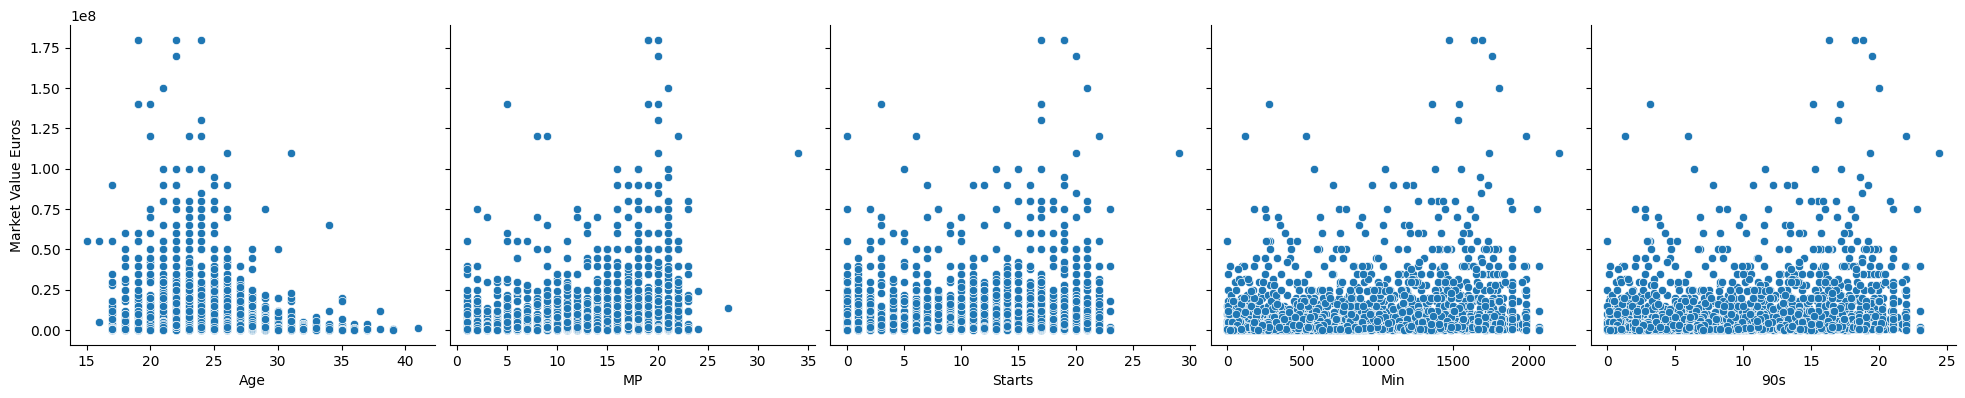

In [36]:
stats = sns.pairplot(data=player_new,y_vars=['Market Value Euros'],x_vars=['Age', 'MP', 'Starts', 'Min', '90s'], height = 4)

C:\Users\Absar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\Absar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\Absar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\Absar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palet

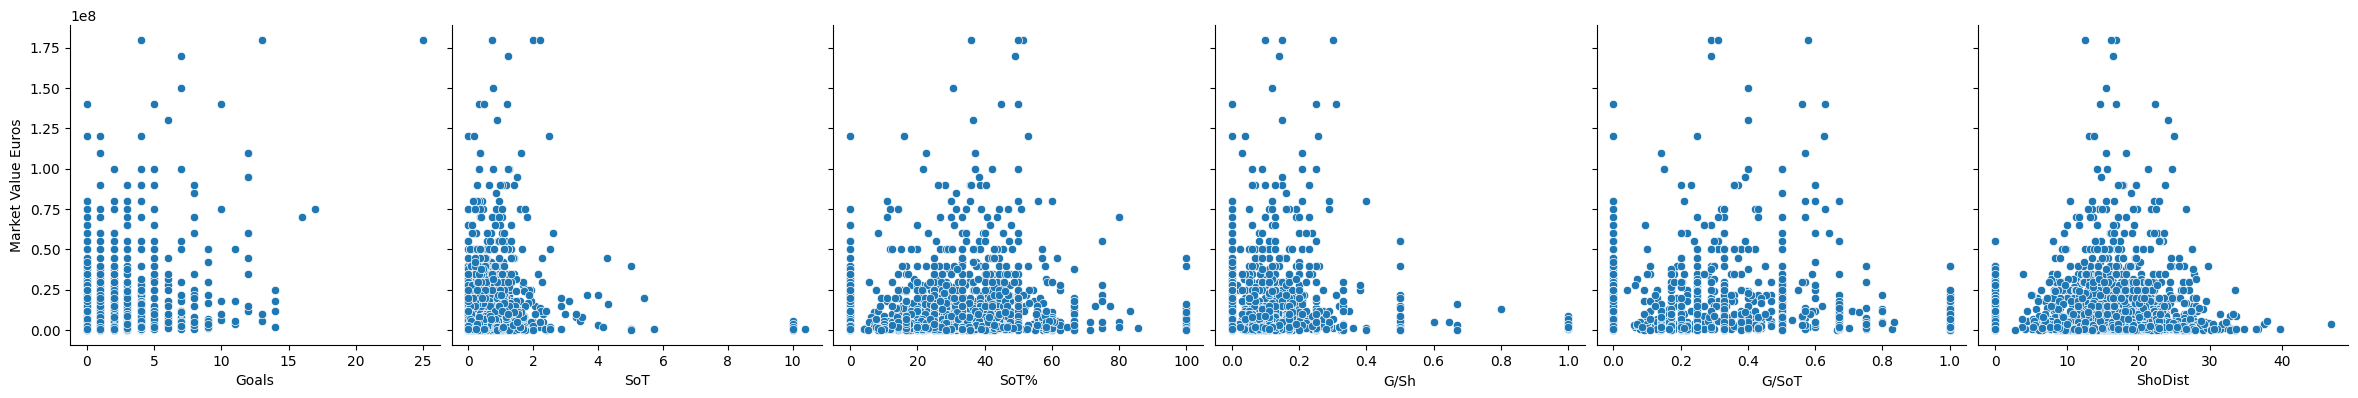

In [37]:
g = sns.pairplot(data=player_new,y_vars=['Market Value Euros'],x_vars=['Goals', 'SoT', 'SoT%', 'G/Sh', 'G/SoT', 'ShoDist'], height = 4, palette = 'red')


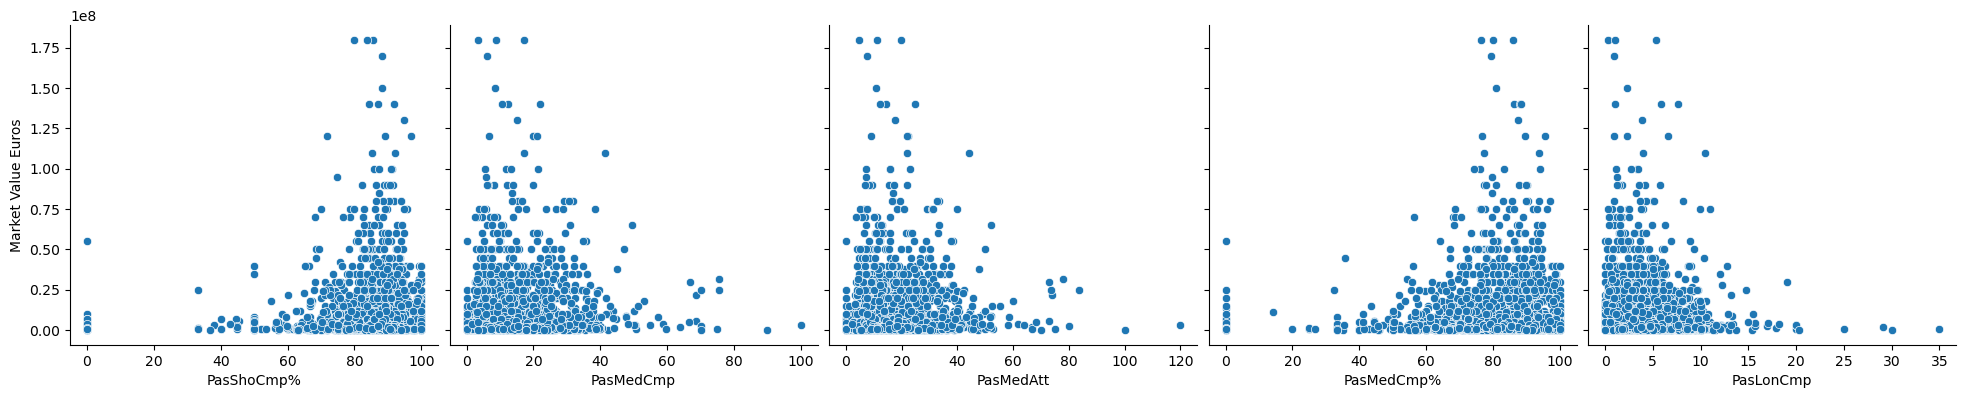

In [79]:
g = sns.pairplot(data=player_new,y_vars=['Market Value Euros'],x_vars=['PasShoCmp%', 'PasMedCmp', 'PasMedAtt', 'PasMedCmp%', 'PasLonCmp'], height = 4)


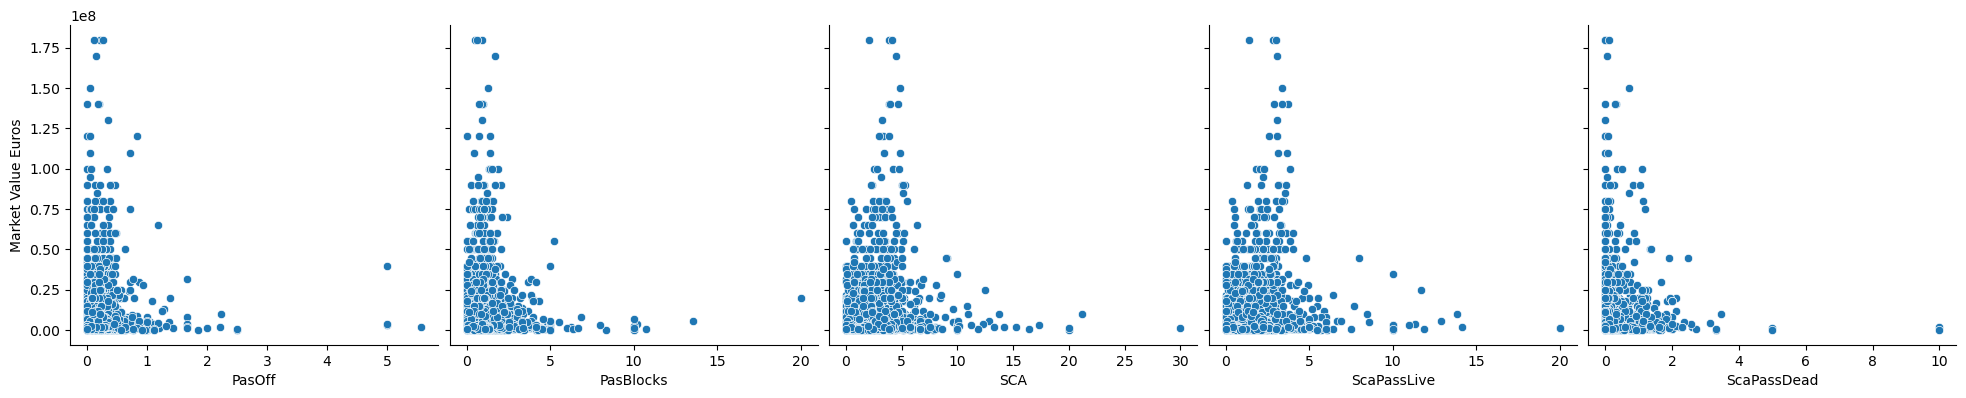

In [ ]:
g = sns.pairplot(data= player_new,y_vars=['Market Value Euros'],x_vars=['PasOff', 'PasBlocks', 'SCA', 'ScaPassLive', 'ScaPassDead'], height = 4)


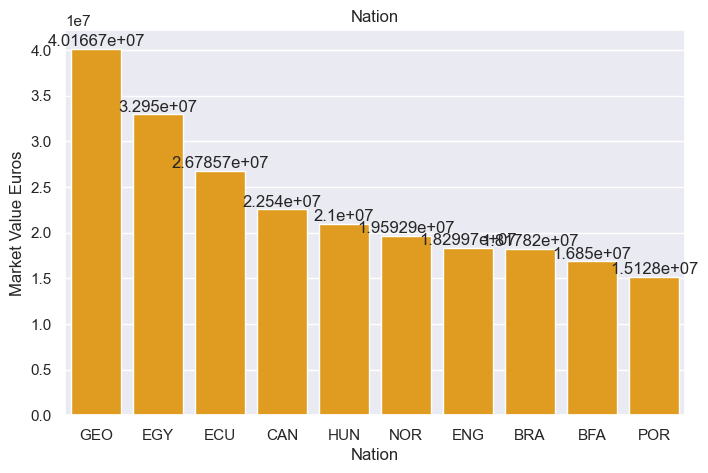

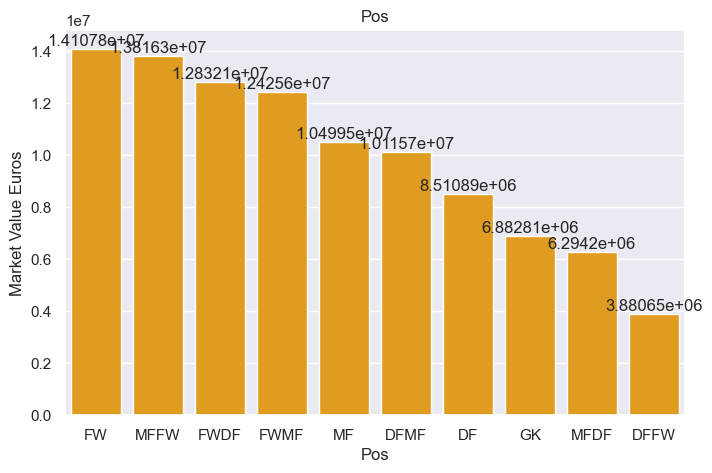

In [86]:
categories = ['Nation', 'Pos']

sns.set(rc={'figure.figsize':(8,5)})

for c in categories:
    if c == 'Nation':
        # Get top 10 nations by average market value
        top_10_nations = player_new.groupby('Nation')['Market Value Euros'].mean().sort_values(ascending=False).head(10)
        player_top_10_nations = player_new[player_new['Nation'].isin(top_10_nations.index)]
        
        # Create bar plot with orange color and sorted data
        ax = sns.barplot(x=c, y="Market Value Euros", data=player_top_10_nations, 
                        errorbar=('ci', False), color='orange', order=top_10_nations.index)
    else:
        # For other categories, sort by average market value and use orange color
        category_means = player_new.groupby(c)['Market Value Euros'].mean().sort_values(ascending=False)
        ax = sns.barplot(x=c, y="Market Value Euros", data=player_new, 
                        errorbar=('ci', False), color='orange', order=category_means.index)
    
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(c)
    plt.show()

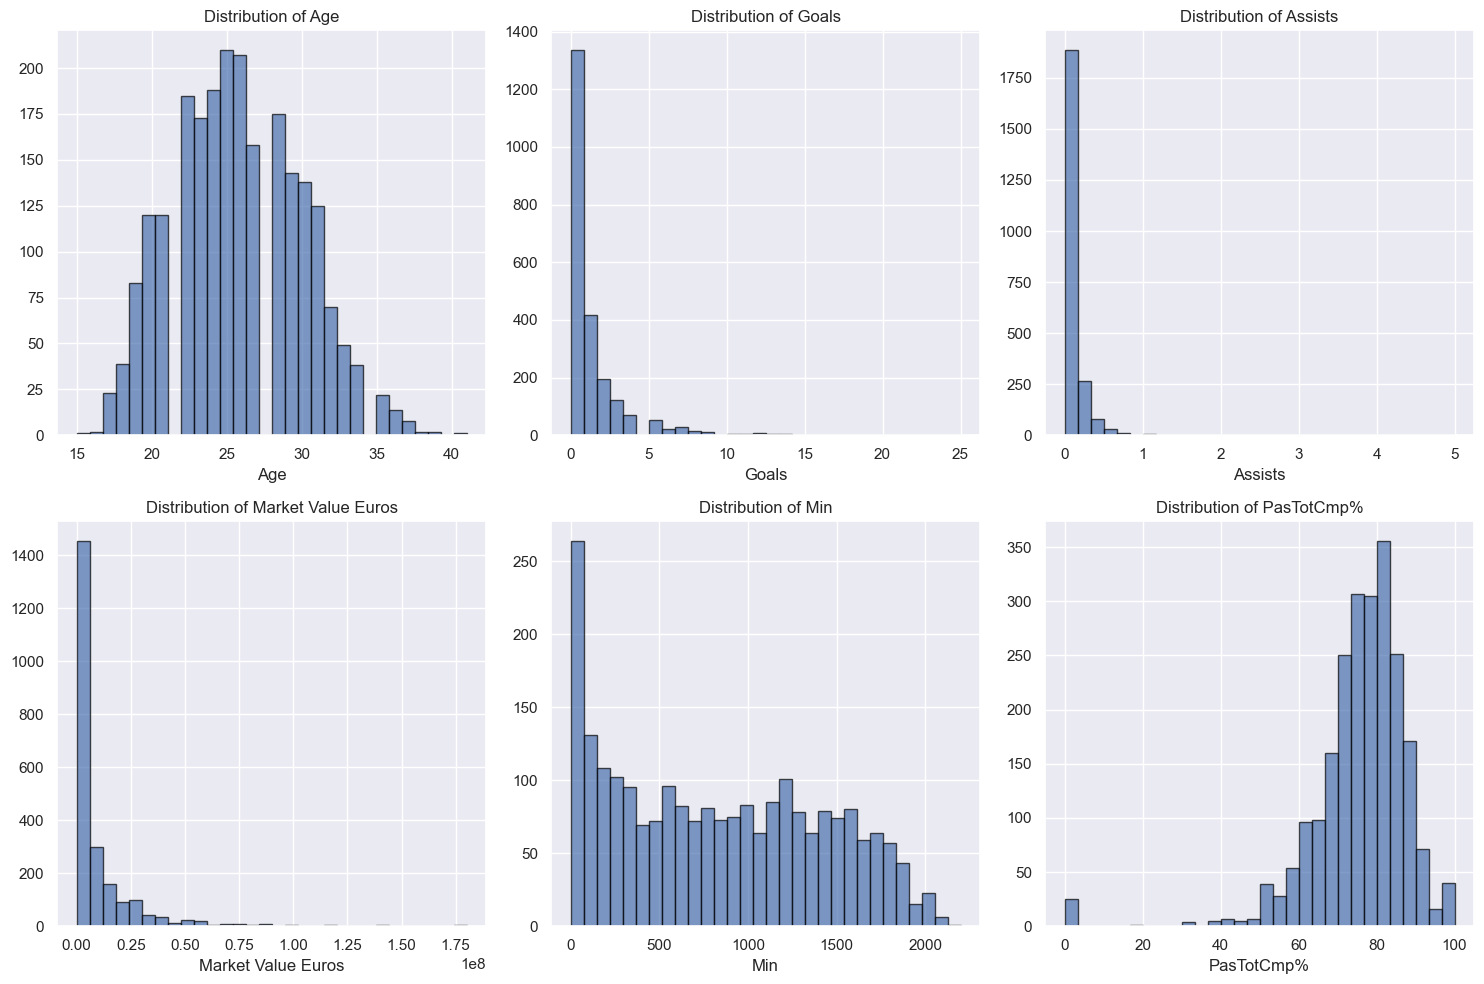

In [88]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

key_vars = ['Age', 'Goals', 'Assists', 'Market Value Euros', 'Min', 'PasTotCmp%']
for i, var in enumerate(key_vars):
    axes[i].hist(player_new[var], bins=30, alpha=0.7, edgecolor='black')
    axes[i].set_title(f'Distribution of {var}')
    axes[i].set_xlabel(var)

plt.tight_layout()
plt.show()

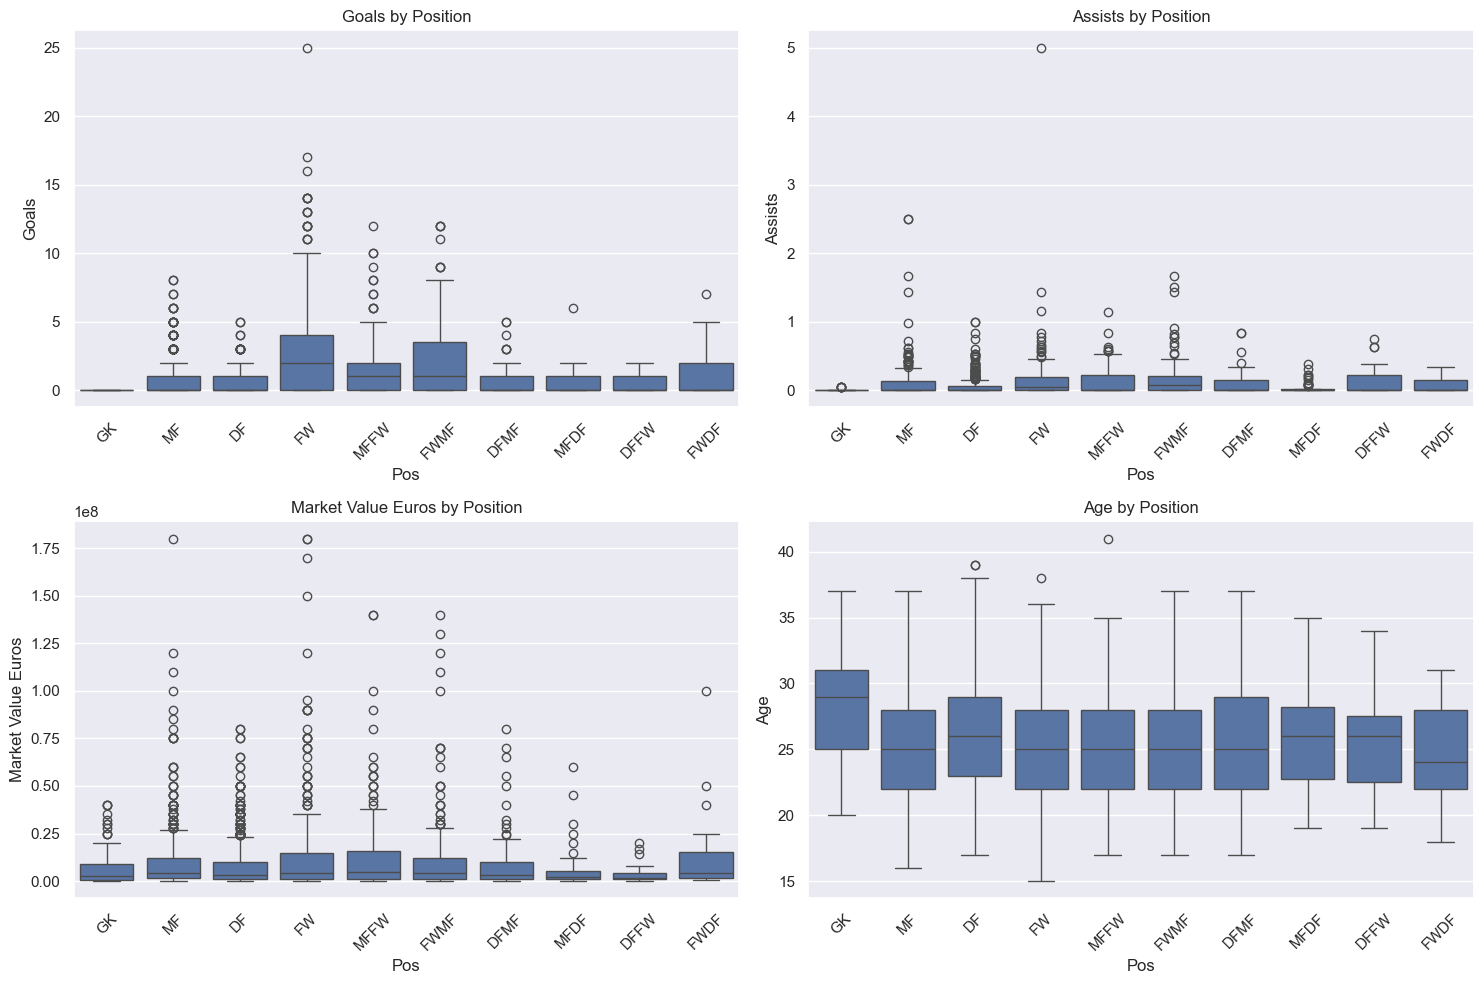

In [89]:
# Box plots to see distributions by position
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

metrics = ['Goals', 'Assists', 'Market Value Euros', 'Age']
for i, metric in enumerate(metrics):
    sns.boxplot(data=player_new, x='Pos', y=metric, ax=axes[i])
    axes[i].set_title(f'{metric} by Position')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

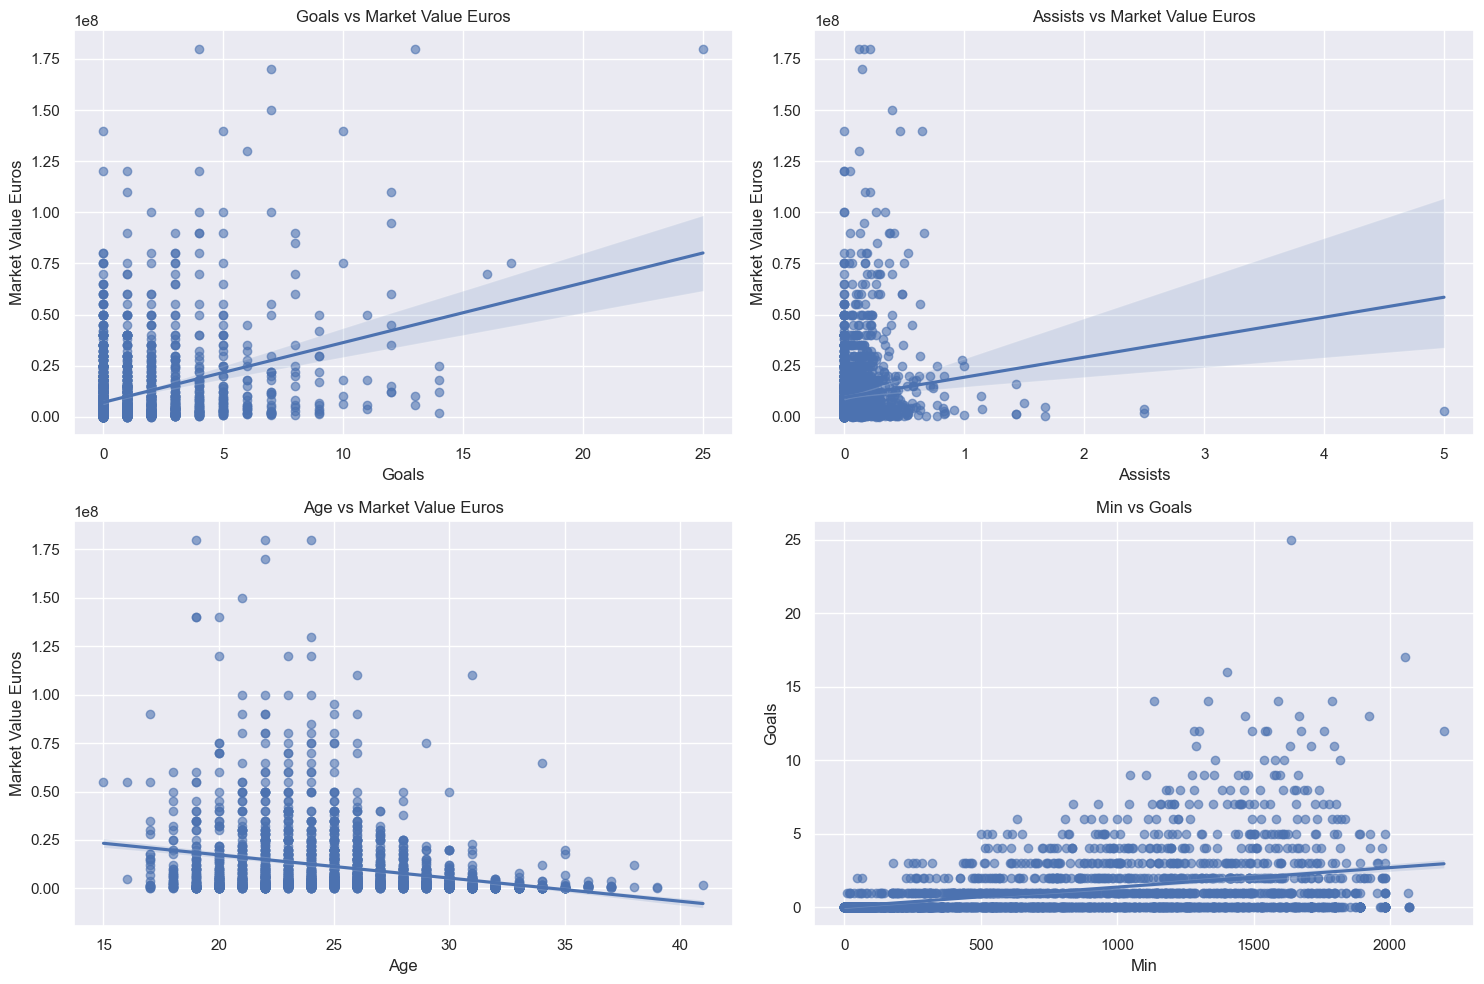

In [91]:
# Scatter plots with regression lines
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

pairs = [('Goals', 'Market Value Euros'), ('Assists', 'Market Value Euros'),
         ('Age', 'Market Value Euros'), ('Min', 'Goals')]

for i, (x, y) in enumerate(pairs):
    sns.regplot(data=player_new, x=x, y=y, ax=axes[i], scatter_kws={'alpha':0.6})
    axes[i].set_title(f'{x} vs {y}')

plt.tight_layout()
plt.show()

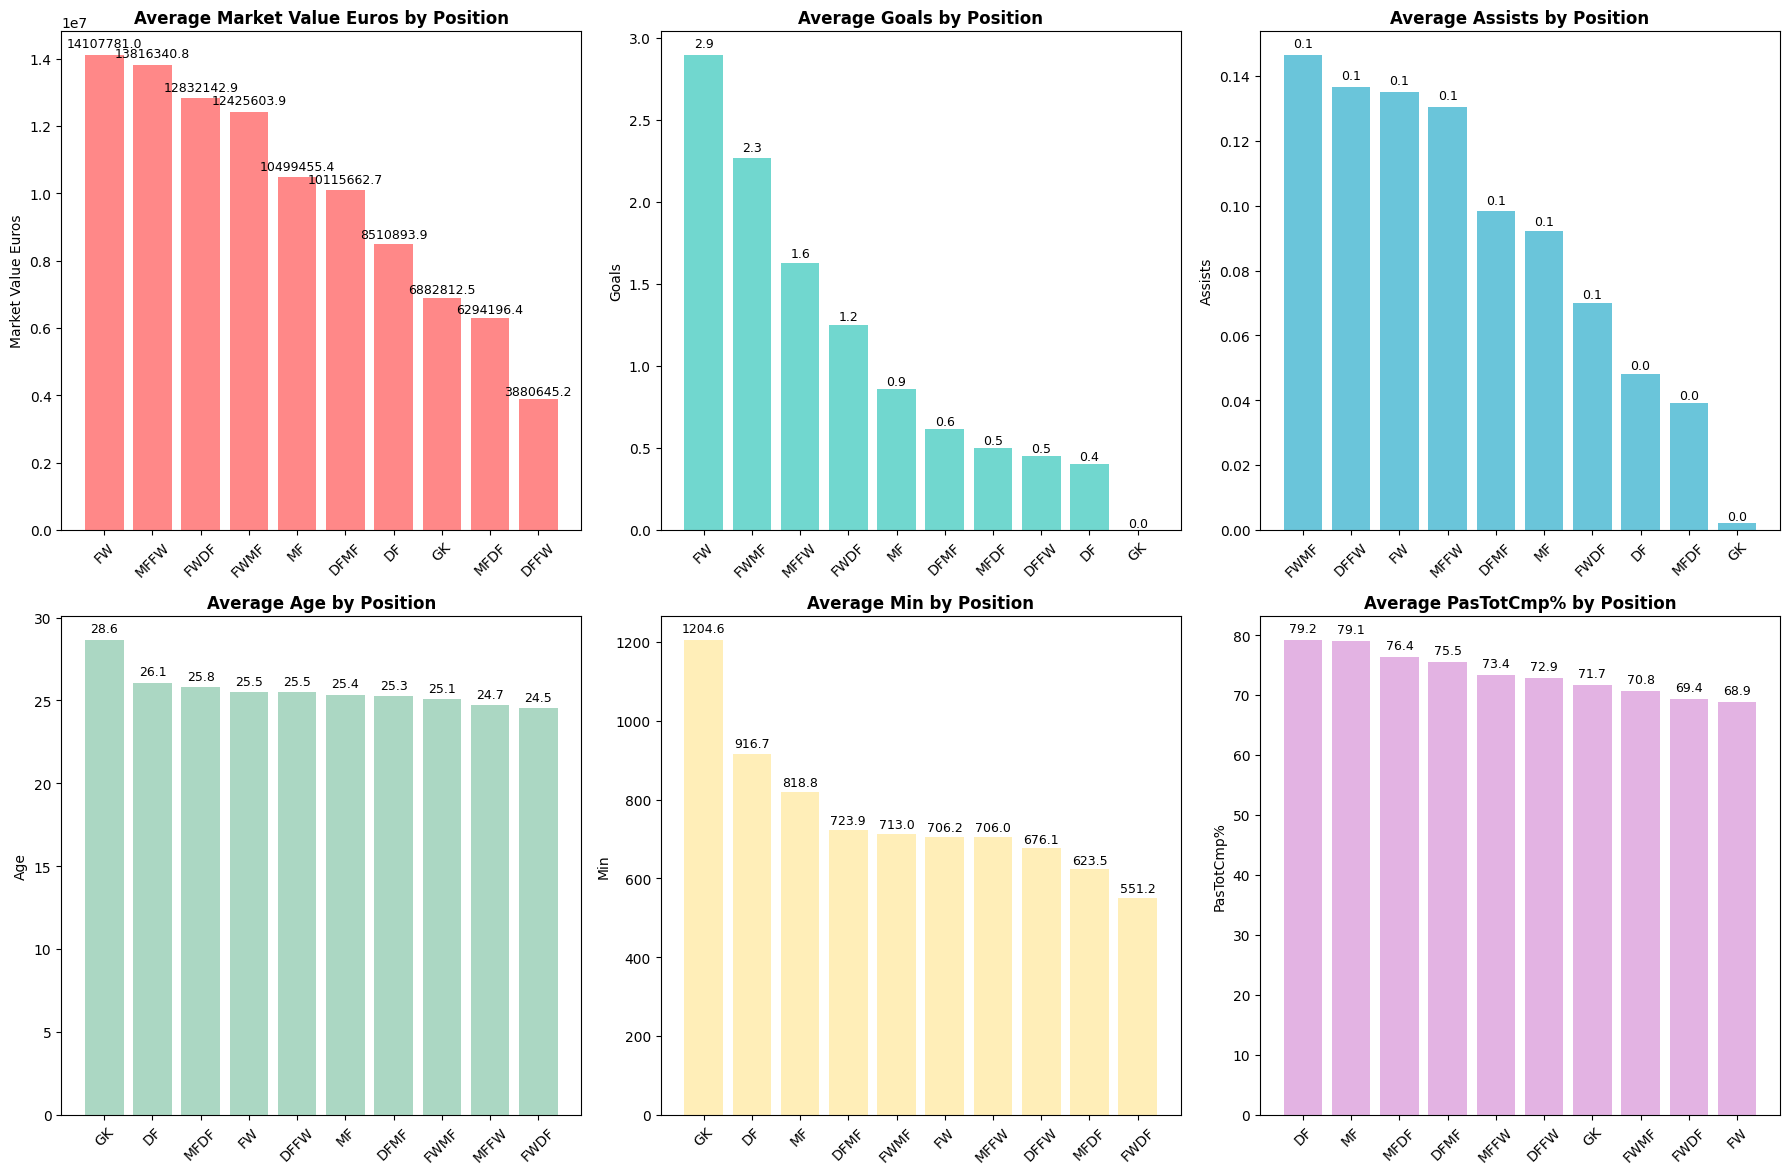

In [39]:
# Position-based analysis with multiple metrics
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

# Key metrics to analyze by position
metrics = ['Market Value Euros', 'Goals', 'Assists', 'Age', 'Min', 'PasTotCmp%']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD']

for i, (metric, color) in enumerate(zip(metrics, colors)):
    # Calculate mean by position
    pos_means = player_new.groupby('Pos')[metric].mean().sort_values(ascending=False)
    
    bars = axes[i].bar(pos_means.index, pos_means.values, color=color, alpha=0.8)
    axes[i].set_title(f'Average {metric} by Position', fontweight='bold')
    axes[i].set_ylabel(metric)
    axes[i].tick_params(axis='x', rotation=45)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                    f'{height:.1f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

C:\Users\Absar\AppData\Local\Temp\ipykernel_16304\263564915.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=player_new, x='Pos', y='Age', ax=axes[0,0], palette='Set3')


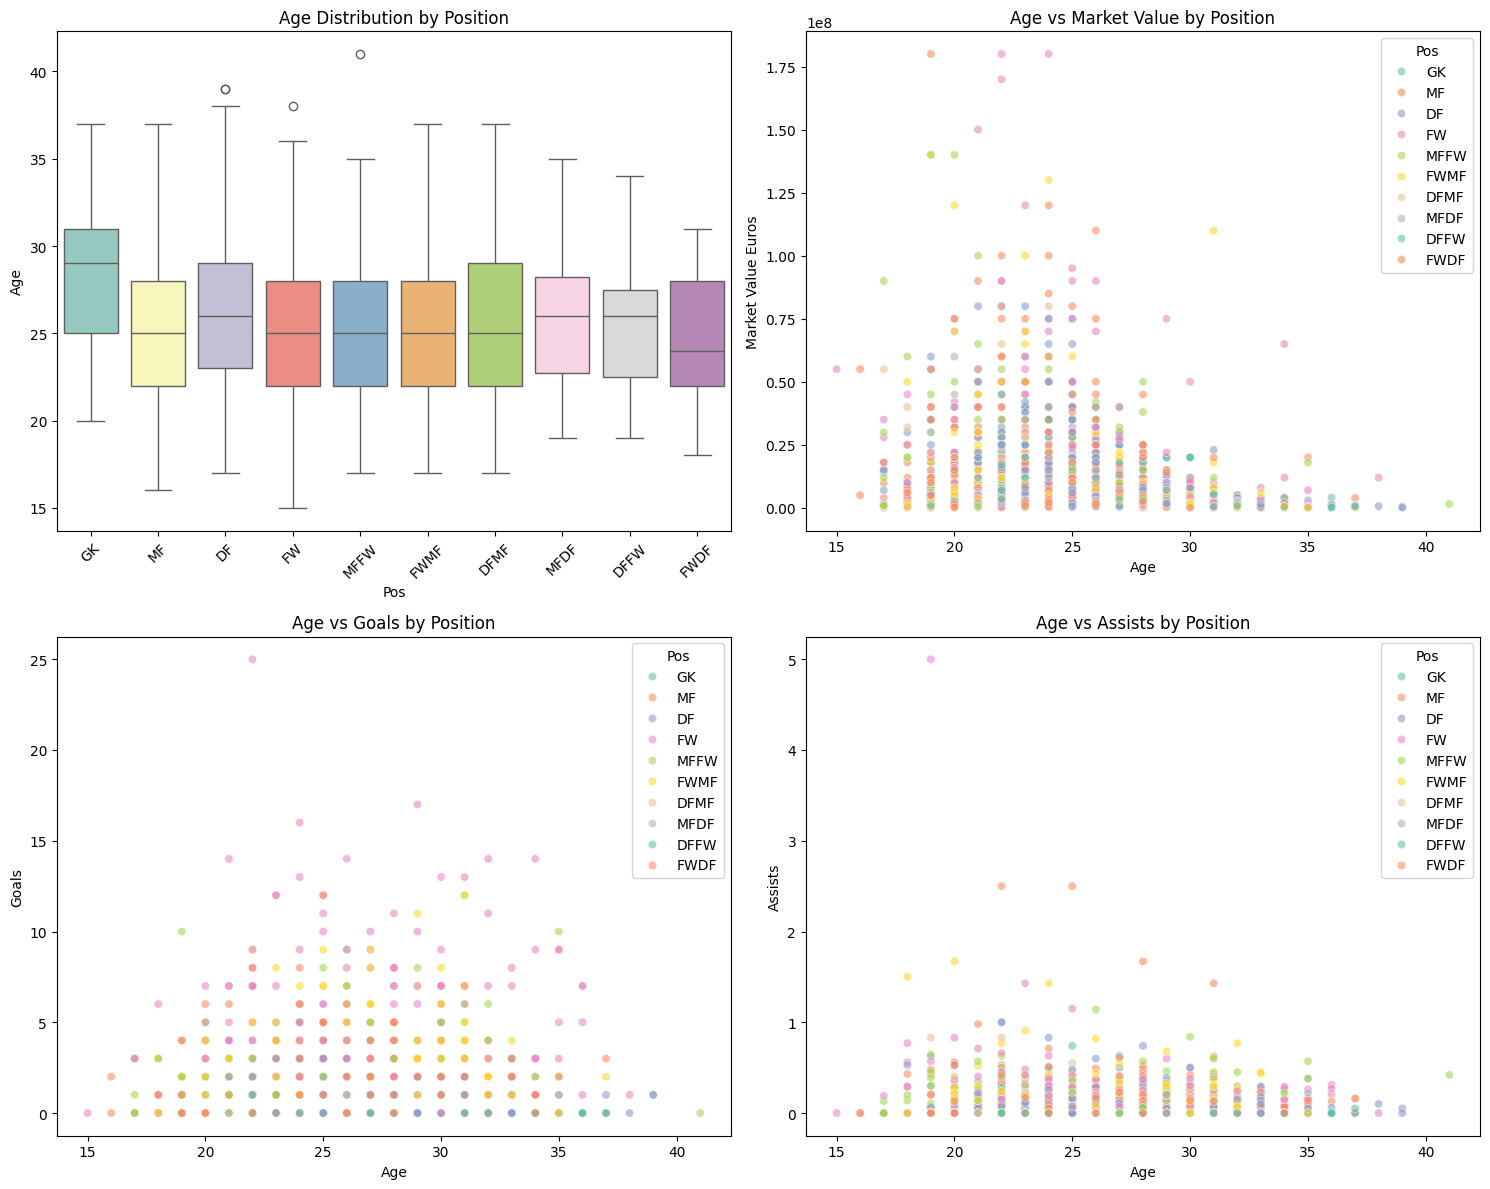

In [40]:
# Age analysis with performance metrics
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Age distribution by position
sns.boxplot(data=player_new, x='Pos', y='Age', ax=axes[0,0], palette='Set3')
axes[0,0].set_title('Age Distribution by Position')
axes[0,0].tick_params(axis='x', rotation=45)

# Age vs Market Value with position coloring
sns.scatterplot(data=player_new, x='Age', y='Market Value Euros', hue='Pos', 
                alpha=0.6, ax=axes[0,1], palette='Set2')
axes[0,1].set_title('Age vs Market Value by Position')

# Age vs Goals
sns.scatterplot(data=player_new, x='Age', y='Goals', hue='Pos', 
                alpha=0.6, ax=axes[1,0], palette='Set2')
axes[1,0].set_title('Age vs Goals by Position')

# Age vs Assists
sns.scatterplot(data=player_new, x='Age', y='Assists', hue='Pos', 
                alpha=0.6, ax=axes[1,1], palette='Set2')
axes[1,1].set_title('Age vs Assists by Position')

plt.tight_layout()
plt.show()

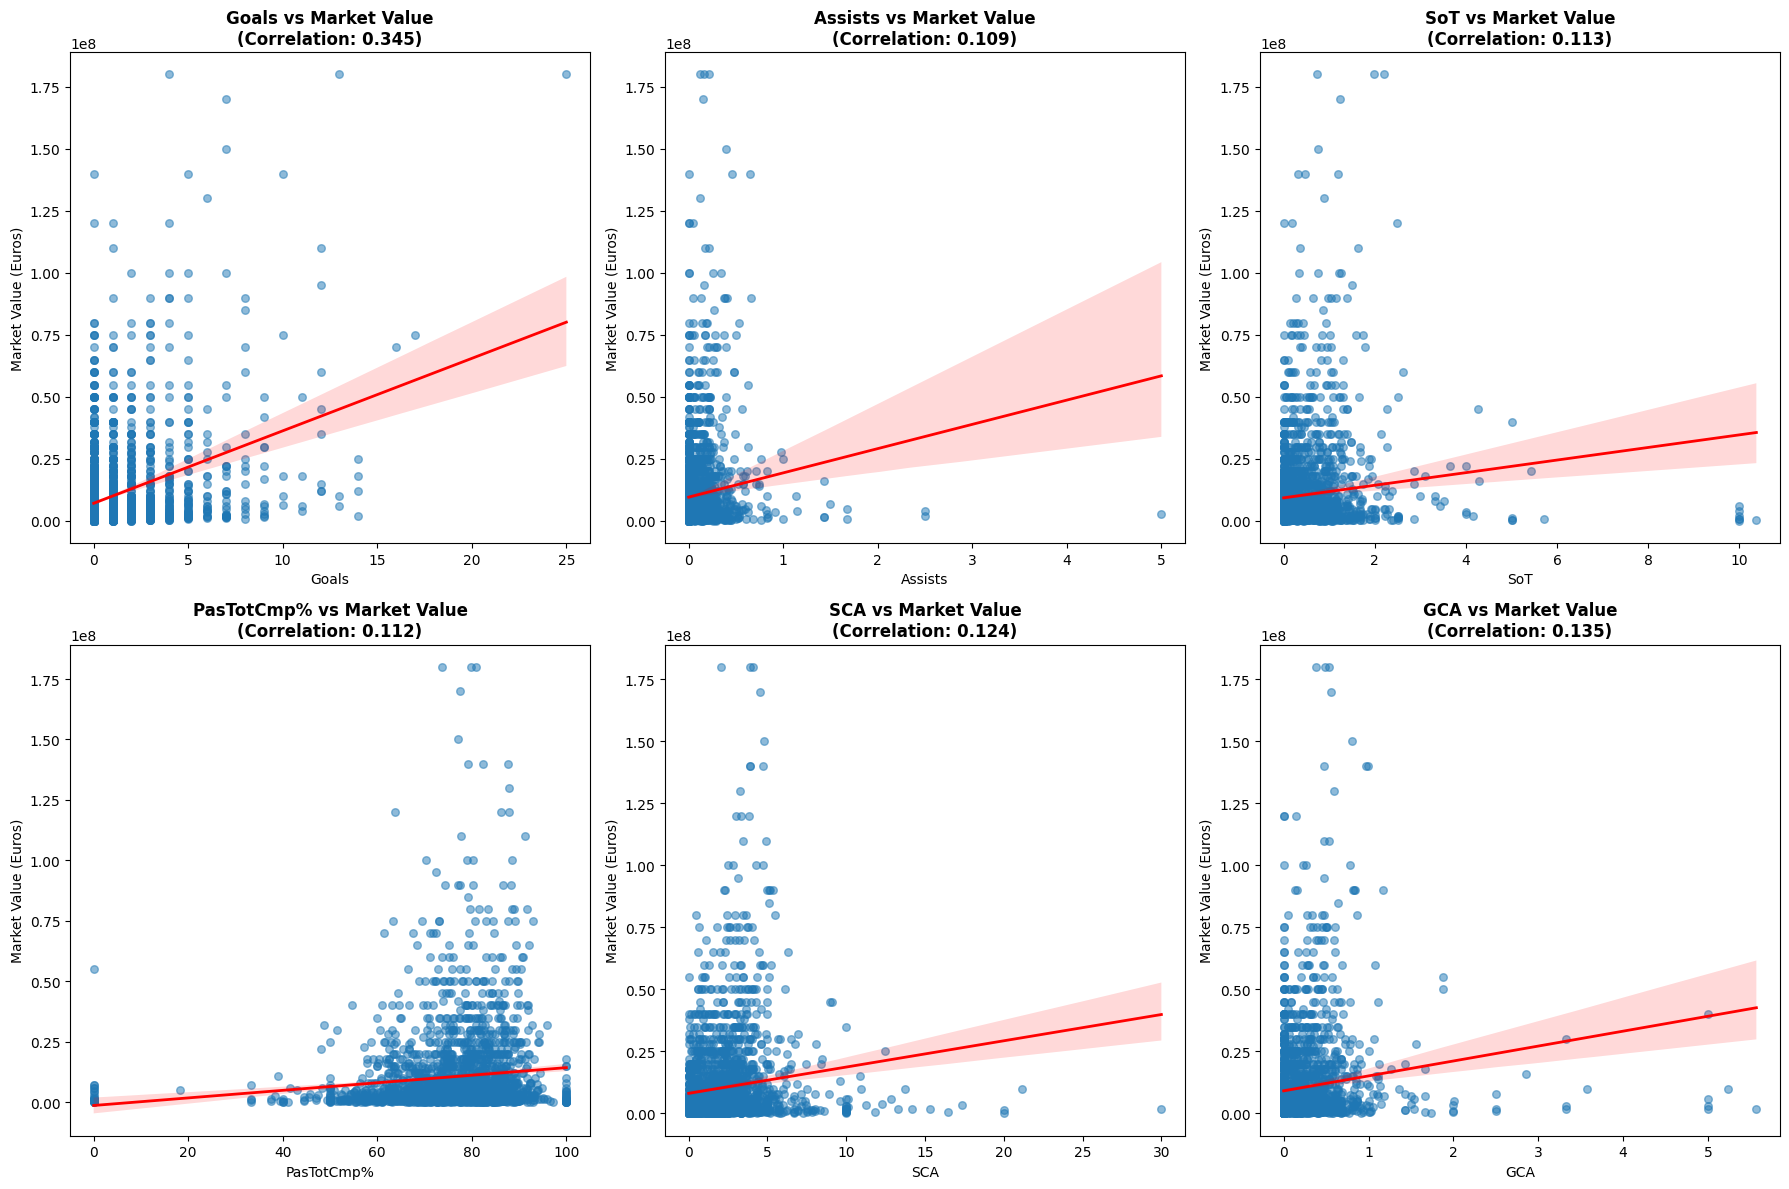

In [41]:
# Performance metrics vs Market Value
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

# Key performance metrics
performance_metrics = ['Goals', 'Assists', 'SoT', 'PasTotCmp%', 'SCA', 'GCA']

for i, metric in enumerate(performance_metrics):
    # Create scatter plot with regression line
    sns.regplot(data=player_new, x=metric, y='Market Value Euros', 
                ax=axes[i], scatter_kws={'alpha':0.5, 's':30}, 
                line_kws={'color':'red', 'linewidth':2})
    
    # Calculate correlation
    corr = player_new[metric].corr(player_new['Market Value Euros'])
    axes[i].set_title(f'{metric} vs Market Value\n(Correlation: {corr:.3f})', fontweight='bold')
    axes[i].set_xlabel(metric)
    axes[i].set_ylabel('Market Value (Euros)')

plt.tight_layout()
plt.show()

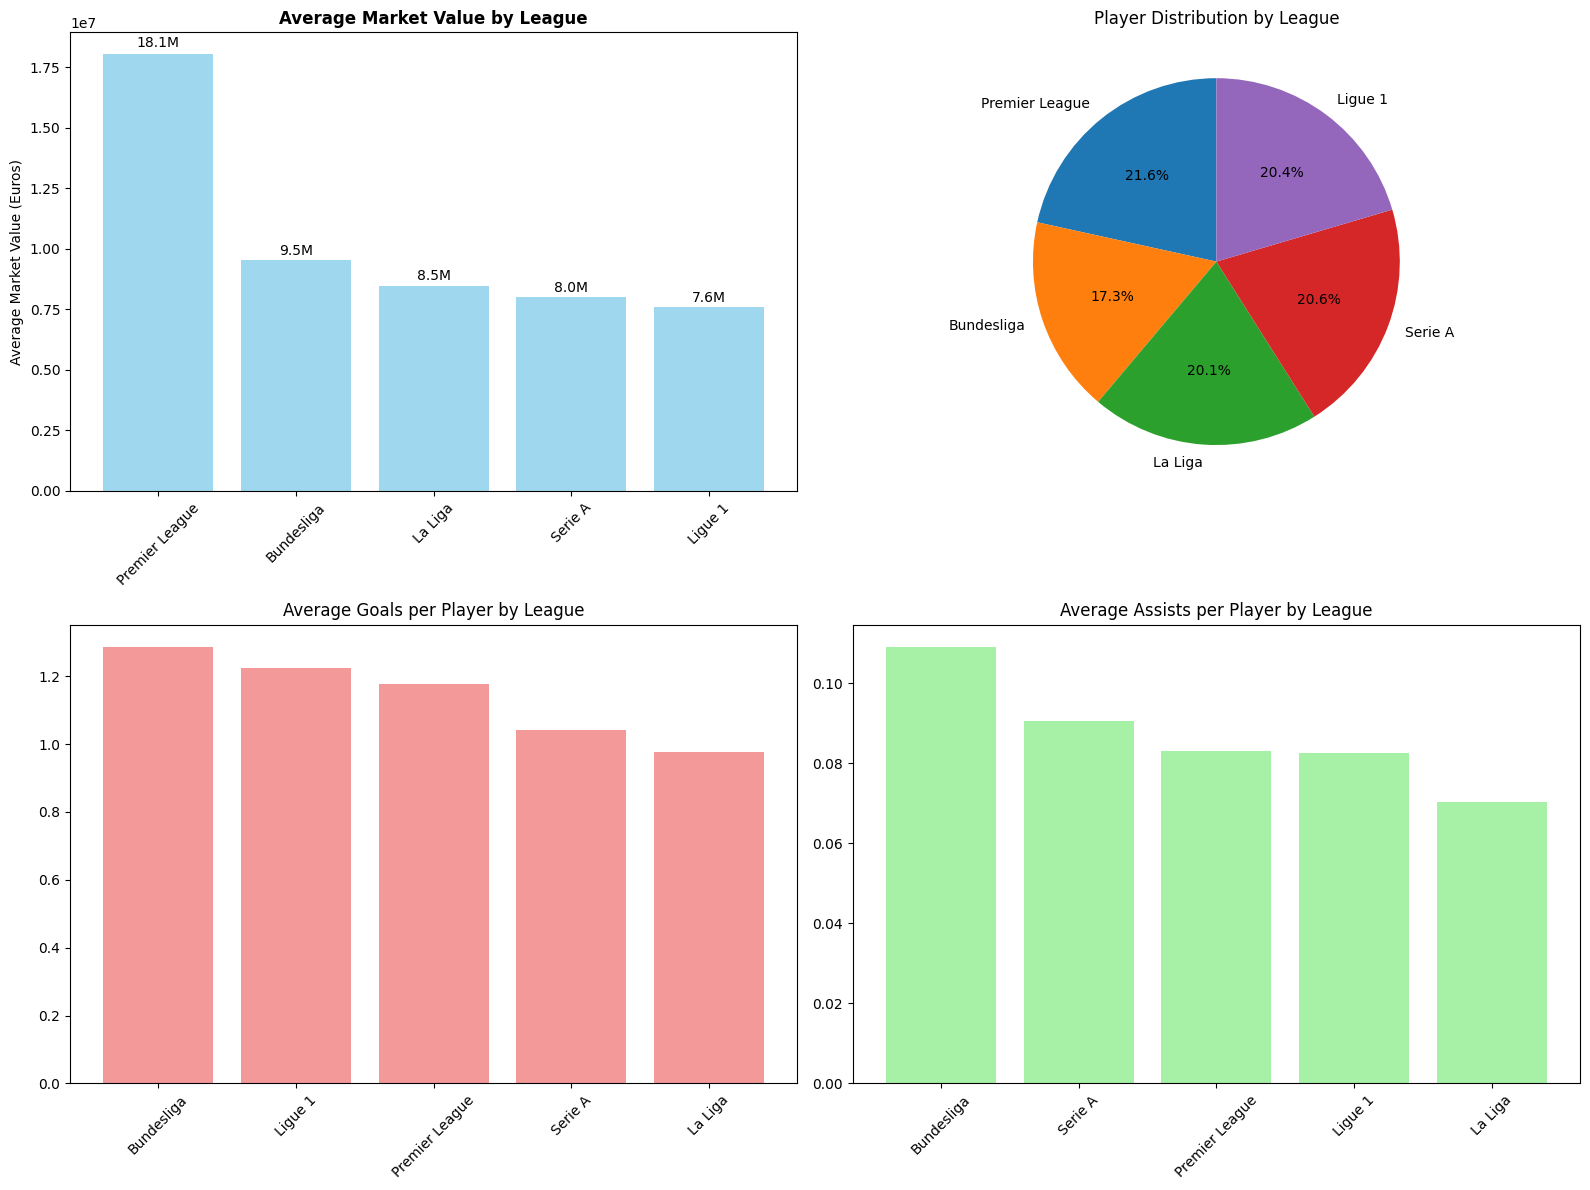

In [42]:
# League-based analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Market Value by League
league_market = player_new.groupby('Comp')['Market Value Euros'].agg(['mean', 'count']).sort_values('mean', ascending=False)
bars = axes[0,0].bar(league_market.index, league_market['mean'], color='skyblue', alpha=0.8)
axes[0,0].set_title('Average Market Value by League', fontweight='bold')
axes[0,0].set_ylabel('Average Market Value (Euros)')
axes[0,0].tick_params(axis='x', rotation=45)

# Add value labels
for bar in bars:
    height = bar.get_height()
    axes[0,0].text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                   f'{height/1e6:.1f}M', ha='center', va='bottom')

# Player count by league
axes[0,1].pie(league_market['count'], labels=league_market.index, autopct='%1.1f%%', startangle=90)
axes[0,1].set_title('Player Distribution by League')

# Goals by League
league_goals = player_new.groupby('Comp')['Goals'].mean().sort_values(ascending=False)
axes[1,0].bar(league_goals.index, league_goals.values, color='lightcoral', alpha=0.8)
axes[1,0].set_title('Average Goals per Player by League')
axes[1,0].tick_params(axis='x', rotation=45)

# Assists by League
league_assists = player_new.groupby('Comp')['Assists'].mean().sort_values(ascending=False)
axes[1,1].bar(league_assists.index, league_assists.values, color='lightgreen', alpha=0.8)
axes[1,1].set_title('Average Assists per Player by League')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

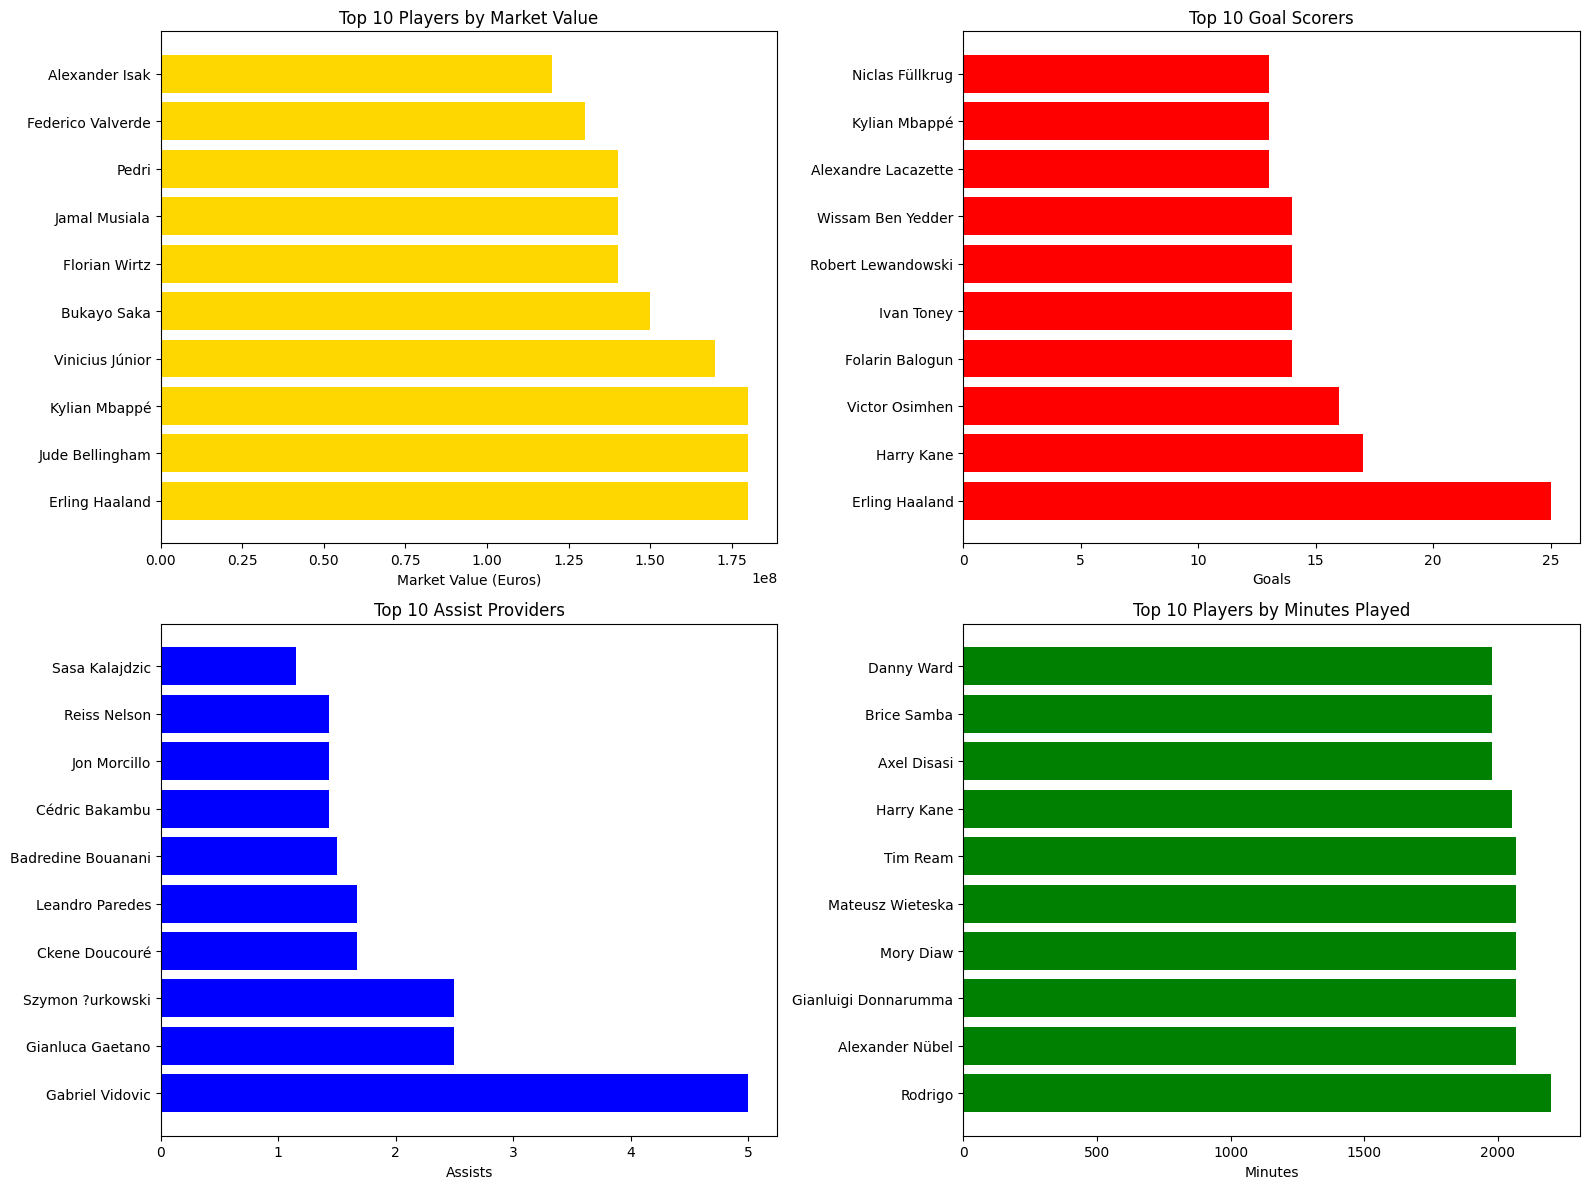

In [44]:
# Top performers analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Top 10 players by market value
top_10_value = player_new.nlargest(10, 'Market Value Euros')
bars = axes[0,0].barh(top_10_value['Player'], top_10_value['Market Value Euros'], color='gold')
axes[0,0].set_title('Top 10 Players by Market Value')
axes[0,0].set_xlabel('Market Value (Euros)')

# Top 10 goal scorers
top_10_goals = player_new.nlargest(10, 'Goals')
bars = axes[0,1].barh(top_10_goals['Player'], top_10_goals['Goals'], color='red')
axes[0,1].set_title('Top 10 Goal Scorers')
axes[0,1].set_xlabel('Goals')

# Top 10 assist providers
top_10_assists = player_new.nlargest(10, 'Assists')
bars = axes[1,0].barh(top_10_assists['Player'], top_10_assists['Assists'], color='blue')
axes[1,0].set_title('Top 10 Assist Providers')
axes[1,0].set_xlabel('Assists')

# Top 10 by minutes played
top_10_minutes = player_new.nlargest(10, 'Min')
bars = axes[1,1].barh(top_10_minutes['Player'], top_10_minutes['Min'], color='green')
axes[1,1].set_title('Top 10 Players by Minutes Played')
axes[1,1].set_xlabel('Minutes')

plt.tight_layout()
plt.show()

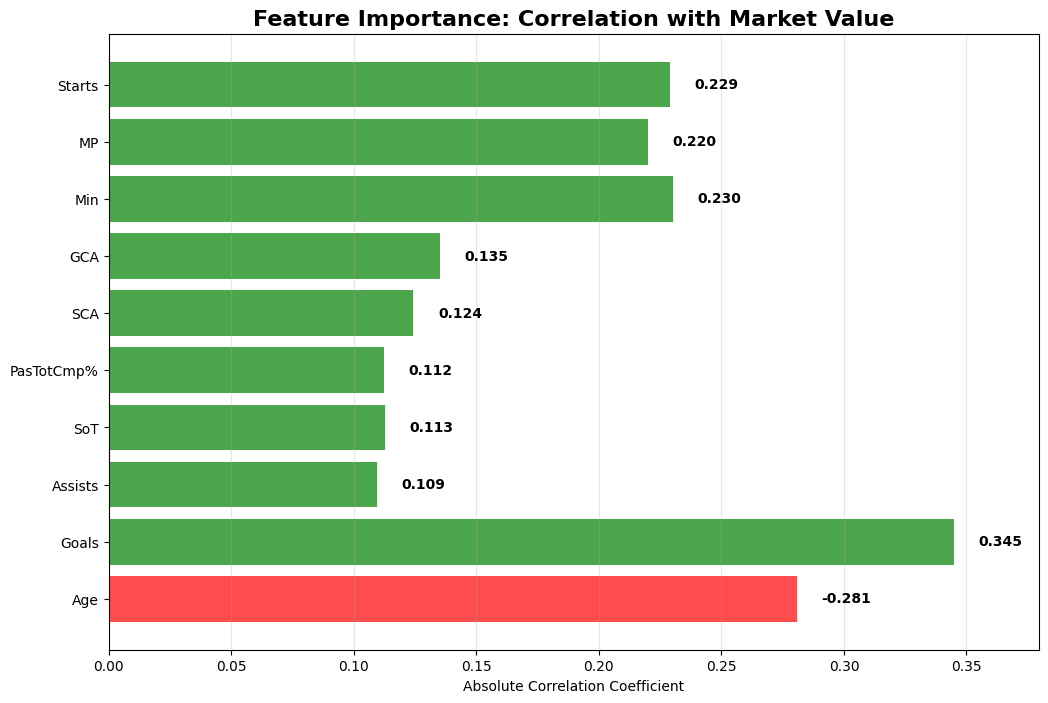

Feature correlations with Market Value:
Goals: 0.345
Age: -0.281
Min: 0.230
Starts: 0.229
MP: 0.220
GCA: 0.135
SCA: 0.124
SoT: 0.113
PasTotCmp%: 0.112
Assists: 0.109


In [45]:
# Feature importance analysis using correlation with market value
# Select key features for analysis
key_features = ['Age', 'Goals', 'Assists', 'SoT', 'PasTotCmp%', 'SCA', 'GCA', 'Min', 'MP', 'Starts']

# Calculate correlations with market value
feature_importance = player_new[key_features + ['Market Value Euros']].corr()['Market Value Euros'].drop('Market Value Euros')

# Create feature importance plot
plt.figure(figsize=(12, 8))
colors = ['red' if x < 0 else 'green' for x in feature_importance.values]
bars = plt.barh(feature_importance.index, abs(feature_importance.values), color=colors, alpha=0.7)

# Add correlation values as text
for i, (bar, corr) in enumerate(zip(bars, feature_importance.values)):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, 
             f'{corr:.3f}', va='center', fontweight='bold')

plt.title('Feature Importance: Correlation with Market Value', fontsize=16, fontweight='bold')
plt.xlabel('Absolute Correlation Coefficient')
plt.xlim(0, max(abs(feature_importance.values)) * 1.1)
plt.grid(axis='x', alpha=0.3)
plt.show()

print("Feature correlations with Market Value:")
for feature, corr in feature_importance.sort_values(key=lambda x: abs(x), ascending=False).items():
    print(f"{feature}: {corr:.3f}")

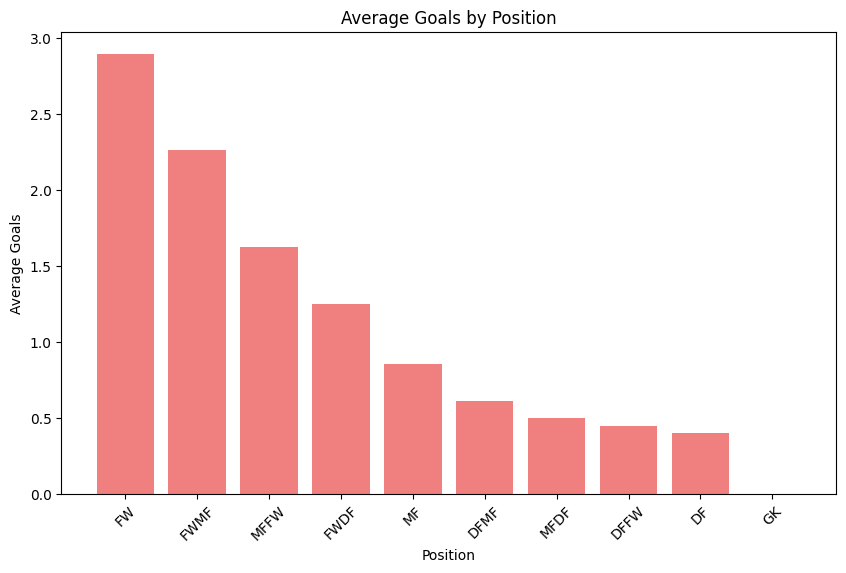

In [ ]:
plt.figure(figsize=(10, 6))
avg_goals = player_new.groupby('Pos')['Goals'].mean().sort_values(ascending=False)
plt.bar(avg_goals.index, avg_goals.values, color='lightcoral')
plt.title('Average Goals by Position')
plt.xlabel('Position')
plt.ylabel('Average Goals')
plt.xticks(rotation=45)
plt.show()

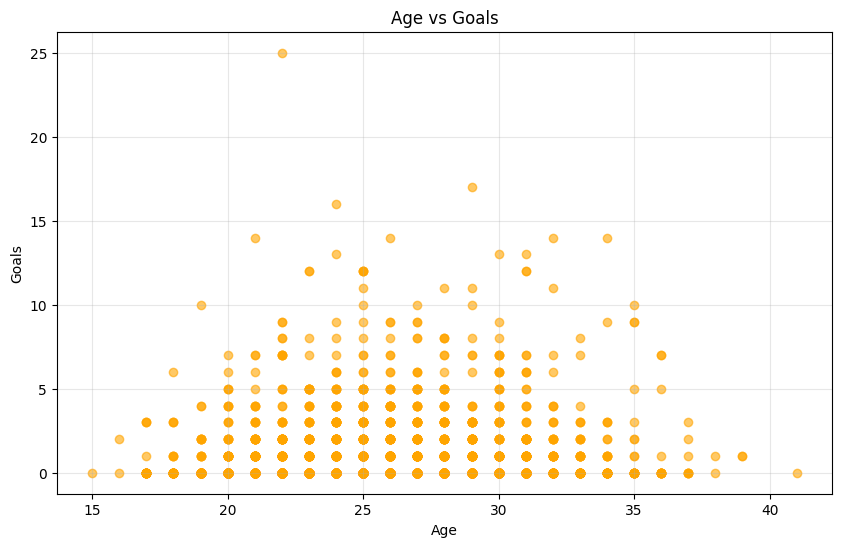

In [52]:
plt.figure(figsize=(10, 6))
plt.scatter(player_new['Age'], player_new['Goals'], alpha=0.6, color='orange')
plt.title('Age vs Goals')
plt.xlabel('Age')
plt.ylabel('Goals')
plt.grid(True, alpha=0.3)
plt.show()